In [20]:
from src.model import PyTradeShifts
from src.postprocessing import Postprocessing
import pandas as pd
import statistics
from matplotlib import pyplot as plt
import os
os.chdir('../../')
print(os.getcwd())

/home


Next we calculate the trade communities for our base scenario as well as global catastrophic infrastructure loss and abrupt sunlight reduction.

In [2]:
base_year = 2022
nuclear_winter_sizes = ["5", "16", "27", "37", "47", "150"]
scenarios = []

Wheat_base = PyTradeShifts(
    "Wheat",
    base_year=base_year,
    region="Global",
    testing=False,
    cd_kwargs={"seed": 2},
    make_plot=False,
)

scenarios.append(Wheat_base)

for size in nuclear_winter_sizes:
    scenario = PyTradeShifts(
        crop="Wheat",
        base_year=base_year,
        scenario_file_name=f"nuclear_winter/xia_{size}tg_y3_swheat.csv",
        scenario_name=f"nuclear_winter_{size}",
        cd_kwargs={"seed": 2},
        make_plot=False,
        keep_singletons=True
    )
    scenarios.append(scenario)


Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.


Built trade graph.
Found 6 trade communities.
Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario nuclear_winter_5.
Built trade graph.
Found 6 trade communities.
Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario nuclear_winter_16.
Built trade graph.
Found 6 trade communities.
Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario nuclear_winter_27.
Built trade graph.
Found 7 trade communities.
Loaded data for Wheat in Y2022.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Corrected re-exports.
Removed countries with tr

To compare the scenario to each other, we have to do a bunch of additional calculations. These all happen in the postprocessing class. Anchor countries are user-specified list of countries that the script attempts to keep the same colour between scenarios.

In [5]:
comparison = Postprocessing(scenarios, anchor_countries=["United States", "Russia"])

Starting postprocessing computations...


In [29]:
# Create an empty dataframe
network_df = pd.DataFrame(columns=['NW', 'Jaccard Distance', 'Imports Relative Difference'])
nuclear_winter_scenarios = [5, 16, 27, 37, 47, 150]
for i, nw in enumerate(nuclear_winter_scenarios):
    # Calculate the median for the jaccard distance
    median_jaccard_distance = statistics.mean([j - 1 for j in comparison.jaccard_indices[i+1].values()])

    # Calculate the median for the imports relative difference
    median_imports_relative_difference = statistics.mean(comparison.imports_difference[i].values())

    # Concat the data to the dataframe
    temp_df = pd.DataFrame({
        'NW': nw,
        'Jaccard Distance': median_jaccard_distance,
        'Imports Relative Difference': median_imports_relative_difference
    }, index=[0])
    network_df = pd.concat([network_df, temp_df], ignore_index=True)



/tmp/ipykernel_99443/1421098981.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  network_df = pd.concat([network_df, temp_df], ignore_index=True)


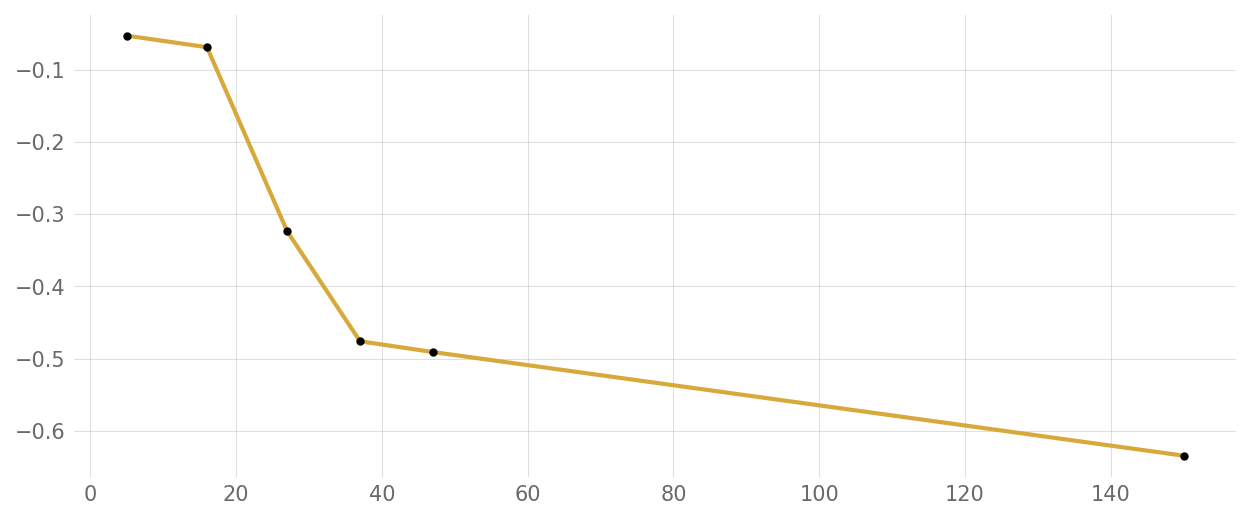

In [34]:
# Plot nuclear winter size vs jaccard distance
plt.plot(network_df['NW'], network_df['Jaccard Distance'], color='#d6a93a')
# Also plot the points
plt.scatter(network_df['NW'], network_df['Jaccard Distance'], color='black', zorder=5)

Text(0, 0.5, 'Wheat Imports Relative Difference [%]')

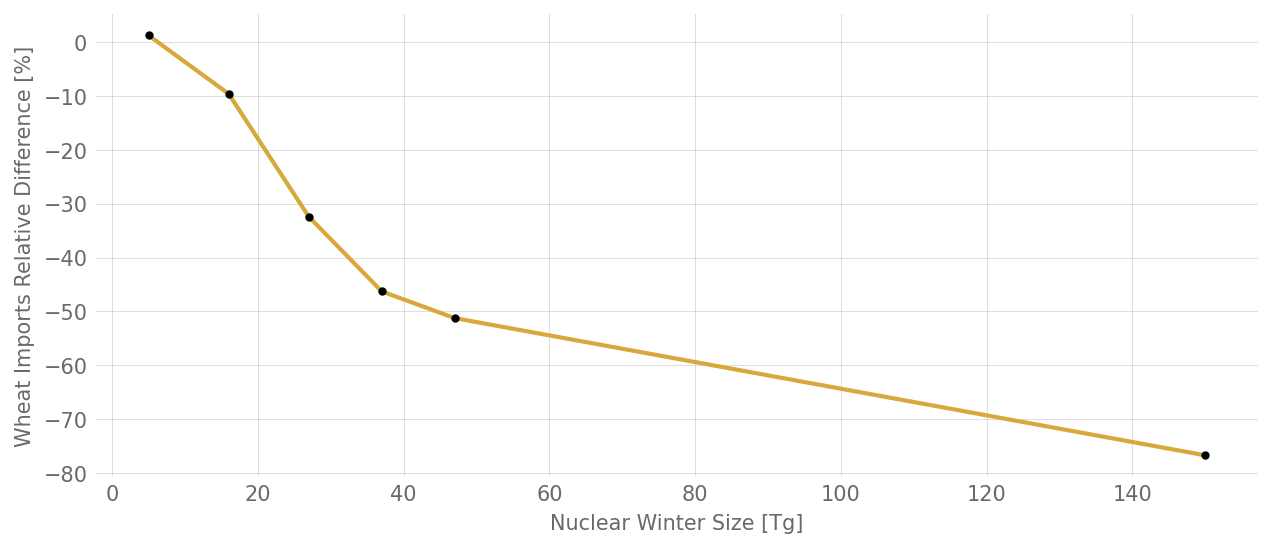

In [35]:
# plot nuclear winter size vs imports relative difference
plt.plot(network_df['NW'], network_df['Imports Relative Difference'], color='#d6a93a')
# Also plot the points
plt.scatter(network_df['NW'], network_df['Imports Relative Difference'], color='black', zorder=5)
# Add labels
plt.xlabel('Nuclear Winter Size [Tg]')
plt.ylabel('Wheat Imports Relative Difference [%]')

Next lets look at how the trade communities change globally in the different scenarios. 

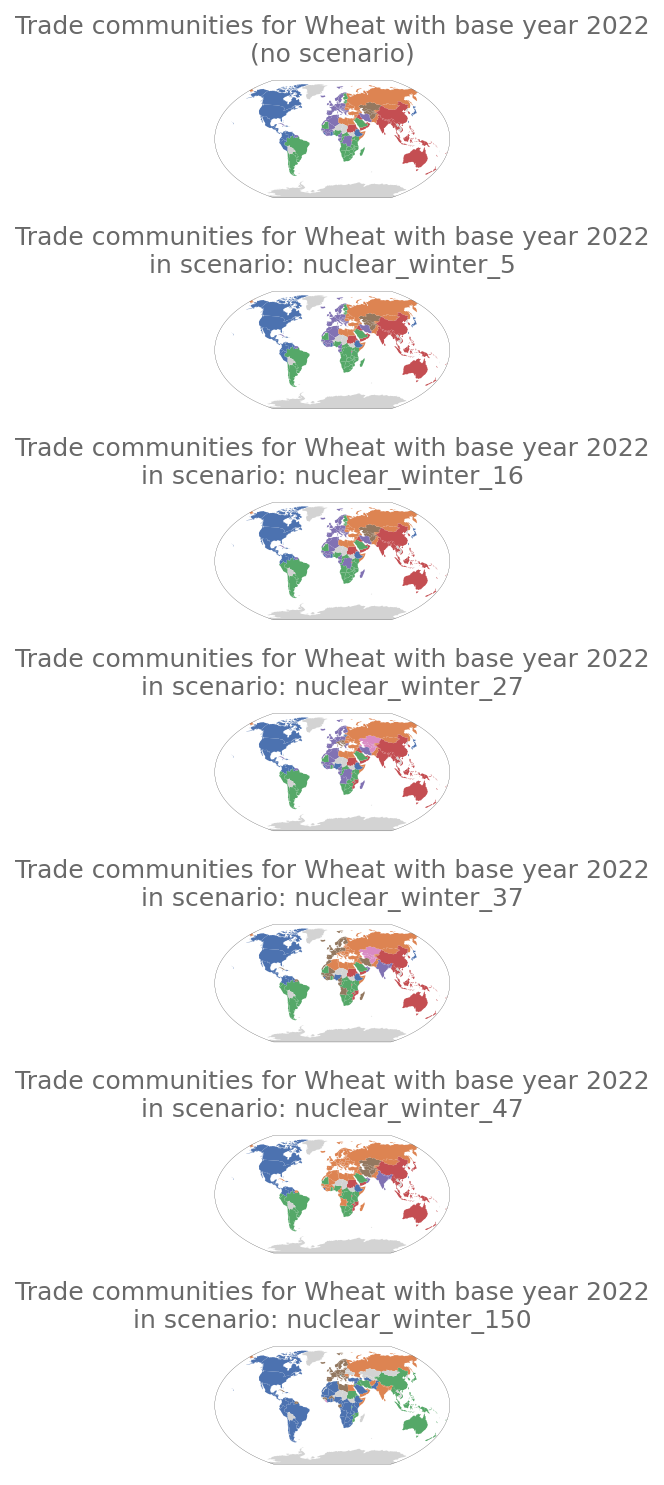

In [6]:
comparison.plot_all_trade_communities(figsize=(15, 10))

We can also try to quantify how different the communities are in each scenario for each country.
The natural way of doing this is the [Jaccard index](https://en.wikipedia.org/wiki/Jaccard_index)
It measures the similarity between two sets.
So for each country we can compute a Jaccard distance (1-Jaccard index)
showing us by how much for each country their community changed in comparison with the base scenario.

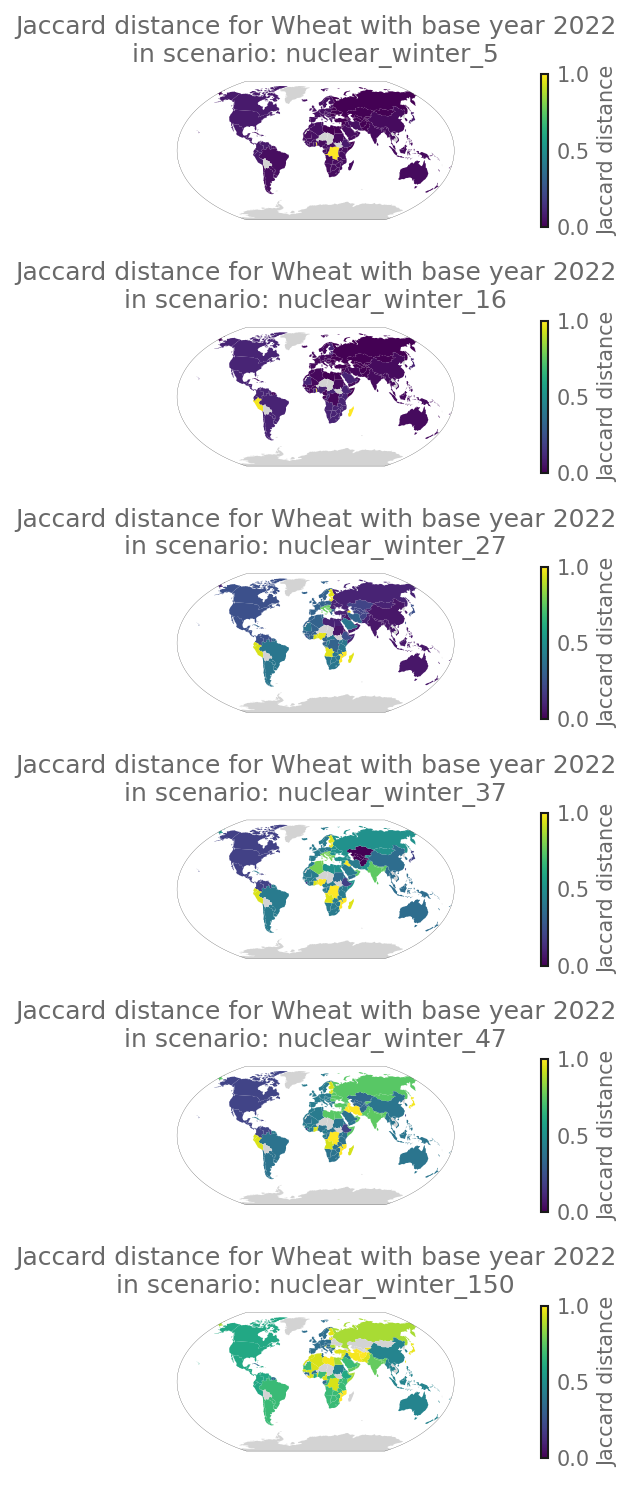

In [7]:
comparison.plot_community_difference(figsize=(10, 10), vmin=0, vmax=1)

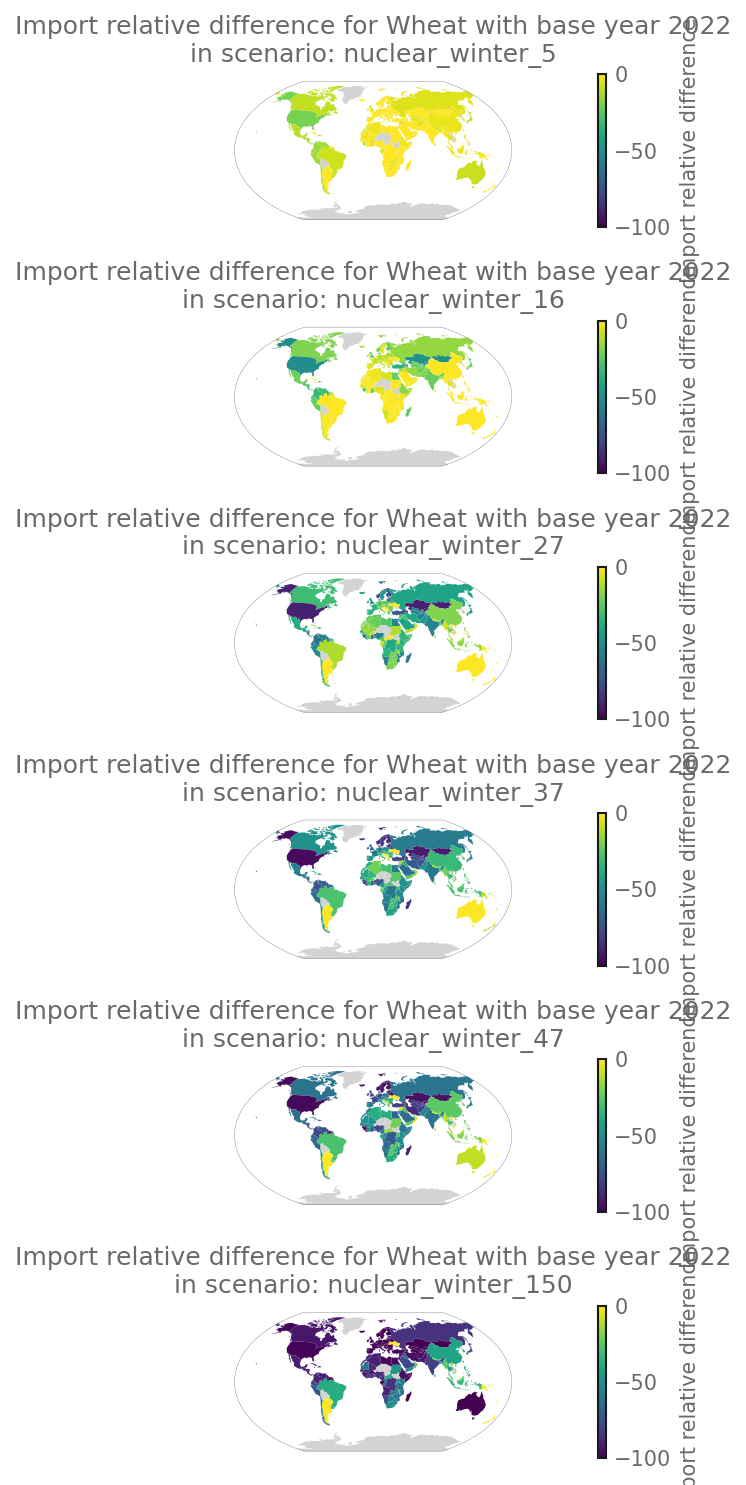

In [8]:
comparison.plot_imports_difference(figsize=(10, 10), vmin=-100, vmax=0)

We can also study the degree centralities (in and out) for all networks:

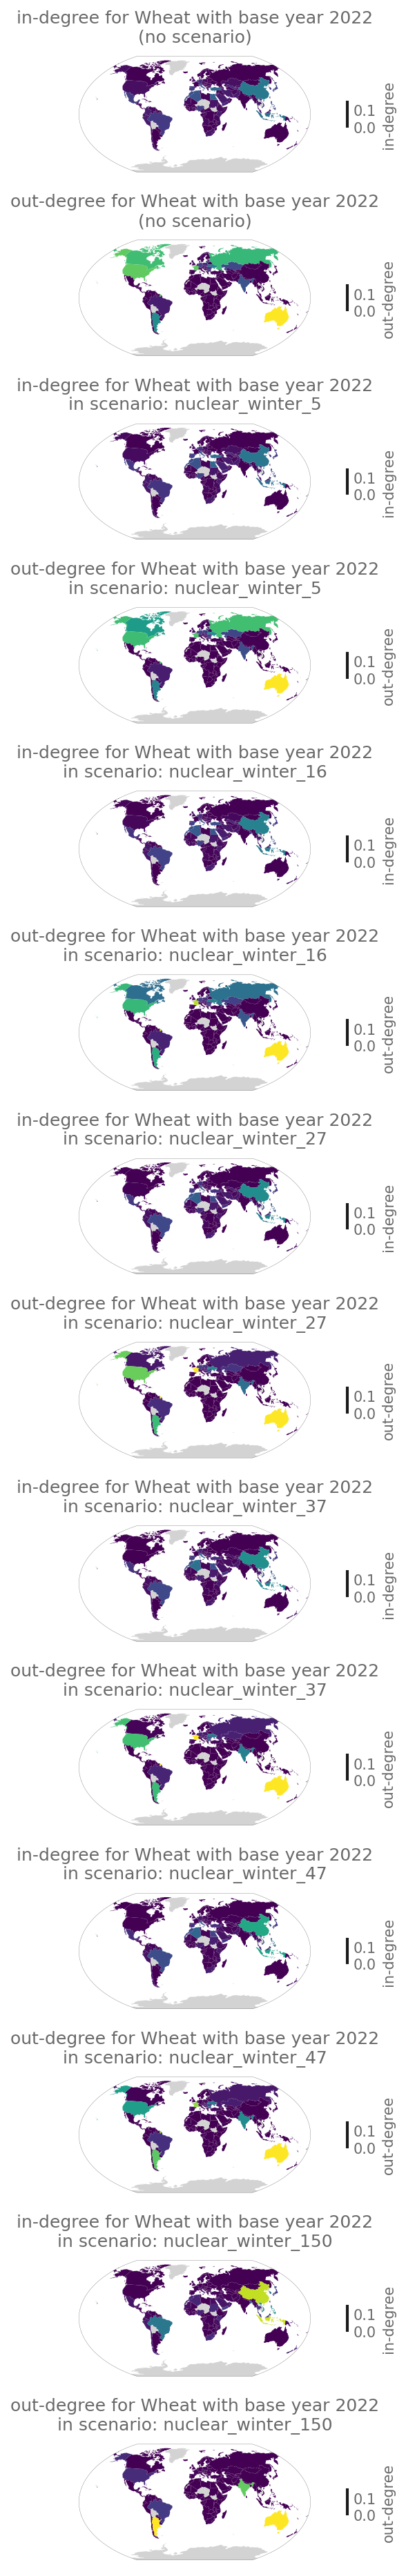

In [10]:
comparison.plot_centrality_maps(figsize=(5, 25), shrink=0.2, vmin=0, vmax=0.15)

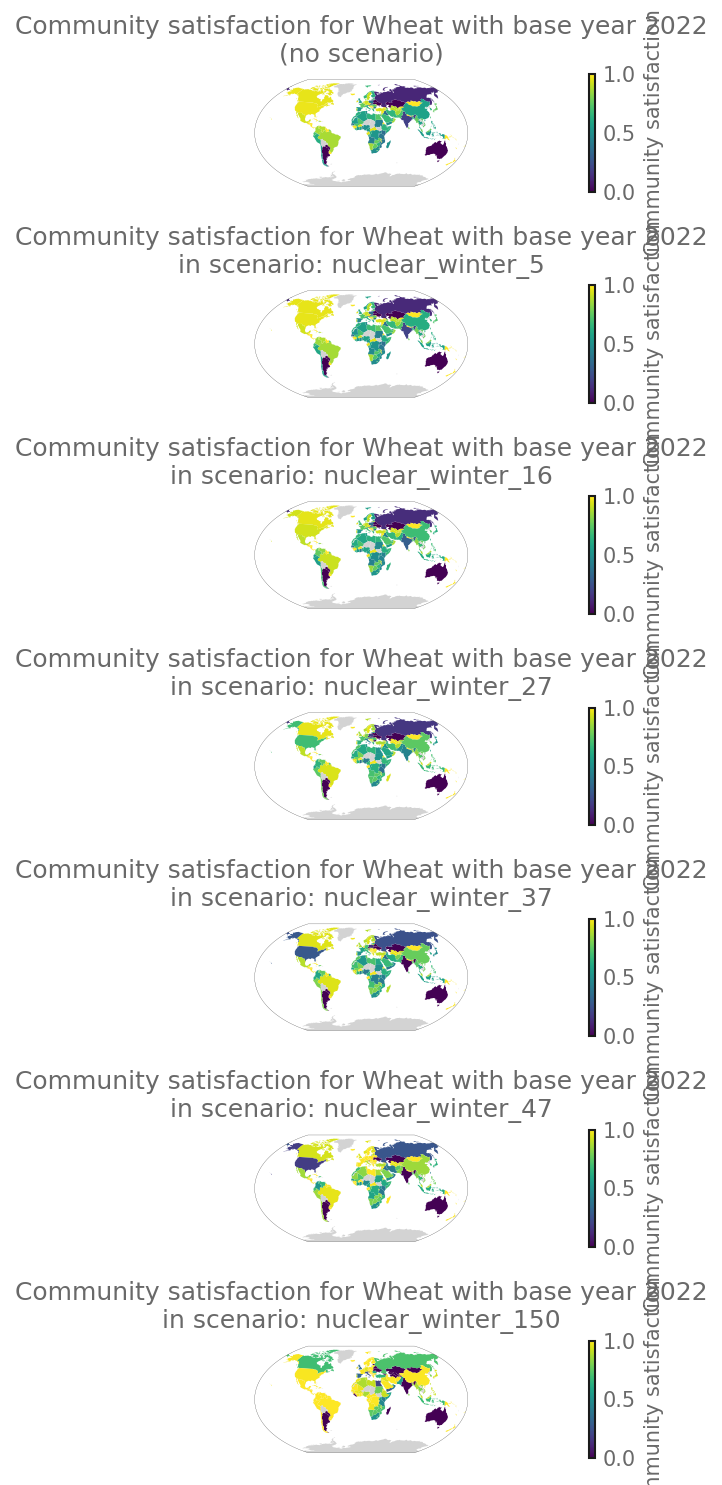

In [11]:
comparison.plot_community_satisfaction(figsize=(15, 10))

and the difference from base scenario:

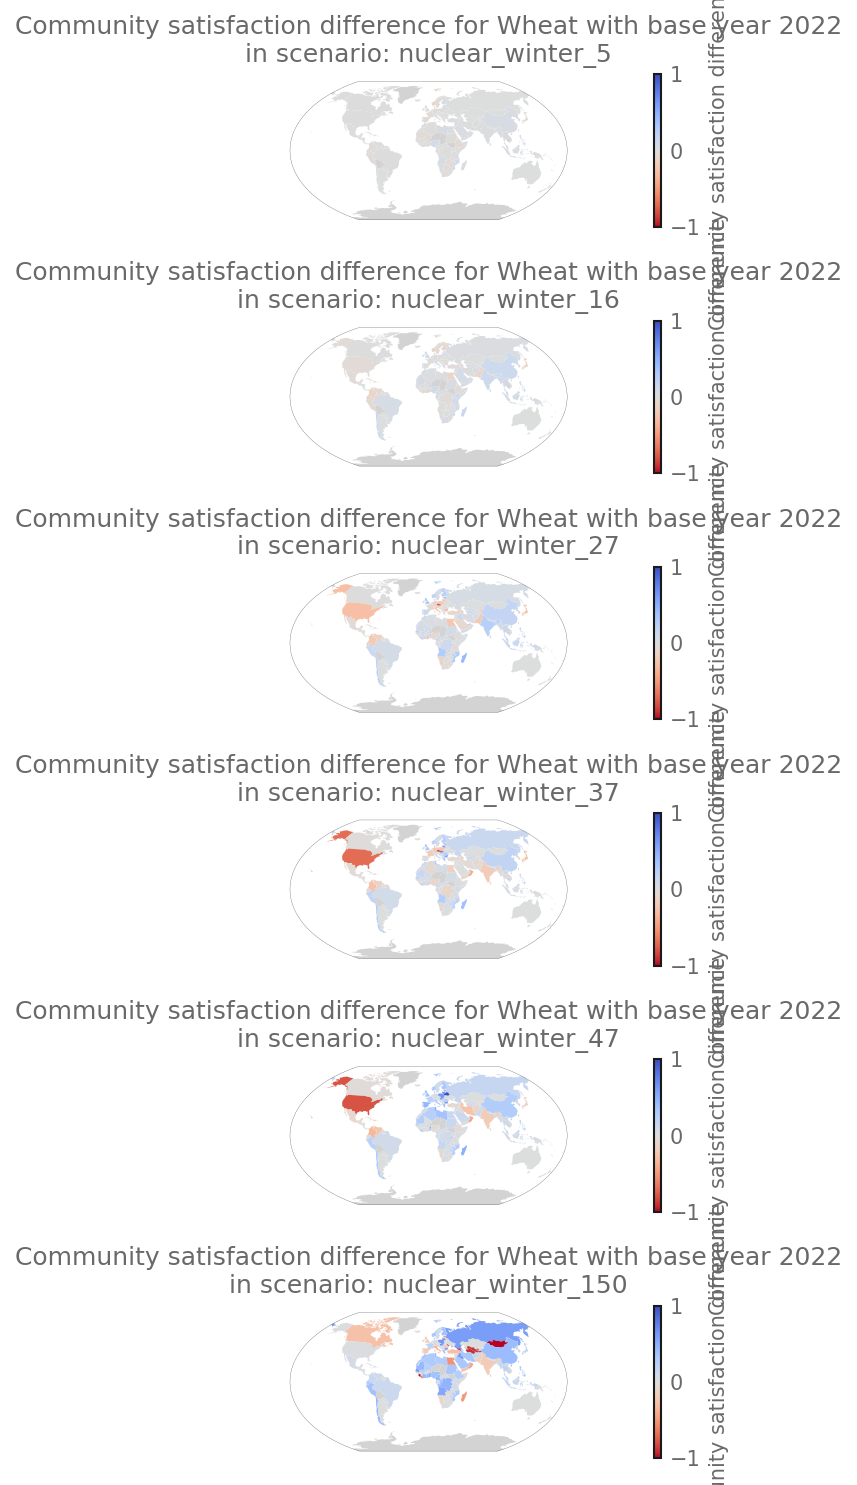

In [12]:
comparison.plot_community_satisfaction_difference(figsize=(10,10), vmin=-1, vmax=1, cmap="coolwarm_r")

We also can look at country's stability index, which is a measure of how easily each country can replace their import partners (same paper as community satisfaction).

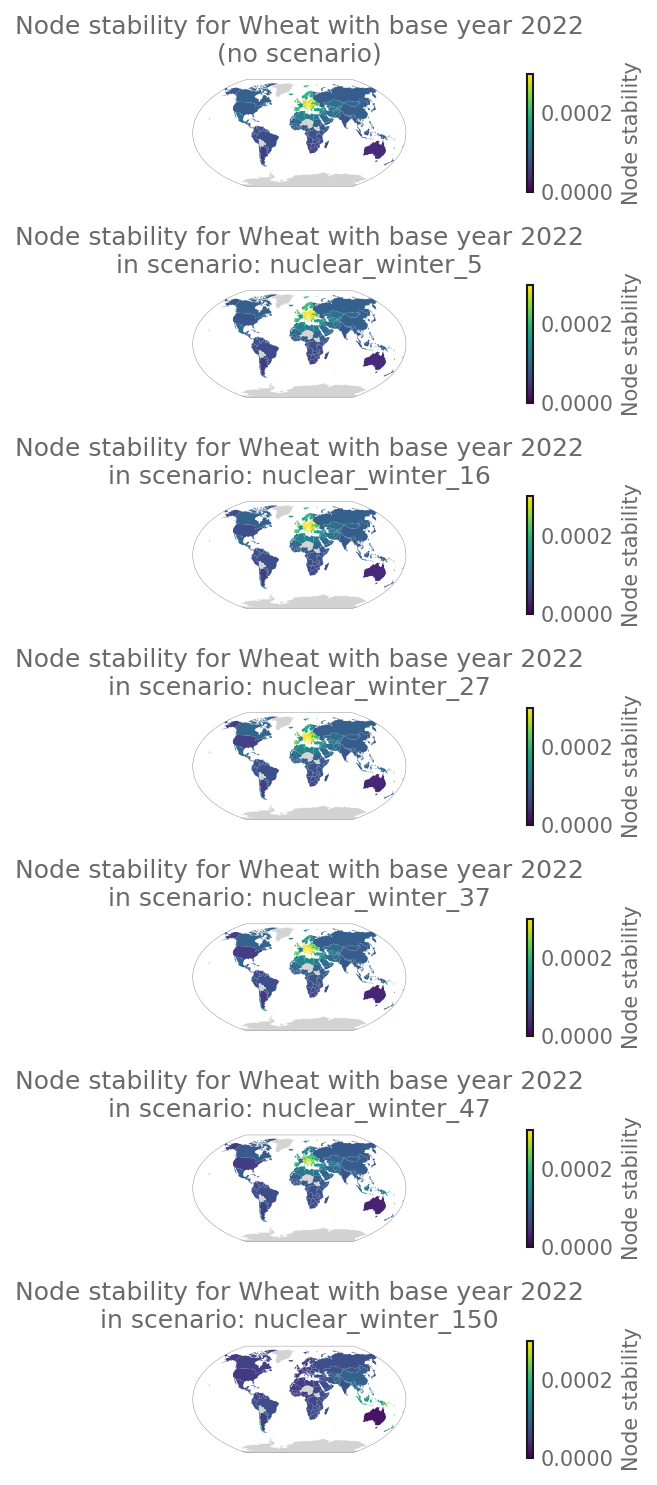

In [13]:
comparison.plot_node_stability(figsize=(15, 10), vmin=0, vmax=0.0003) # figsize works here too of course

The units are dimensionless, so it is better to look at the relative change of the node stability to get a better view. 
For this reason we can look at the *relative* change of this metric:

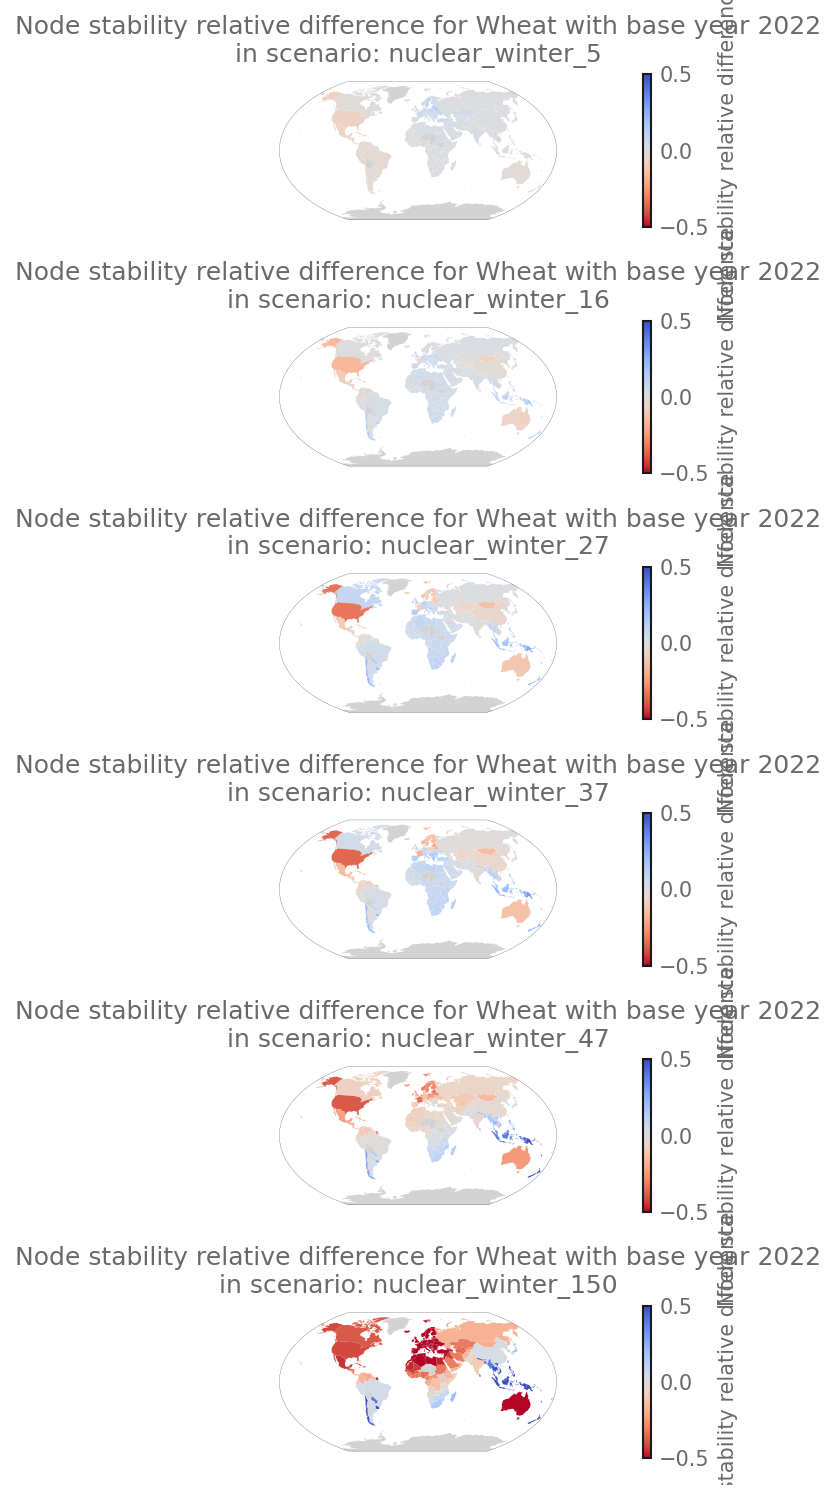

In [14]:
comparison.plot_node_stability_difference(figsize=(10, 10), vmin=-0.5, vmax=0.5, cmap="coolwarm_r")

Another important aspect of a network is its resilience to attacks, and we can see that as well:

IndexError: list index out of range

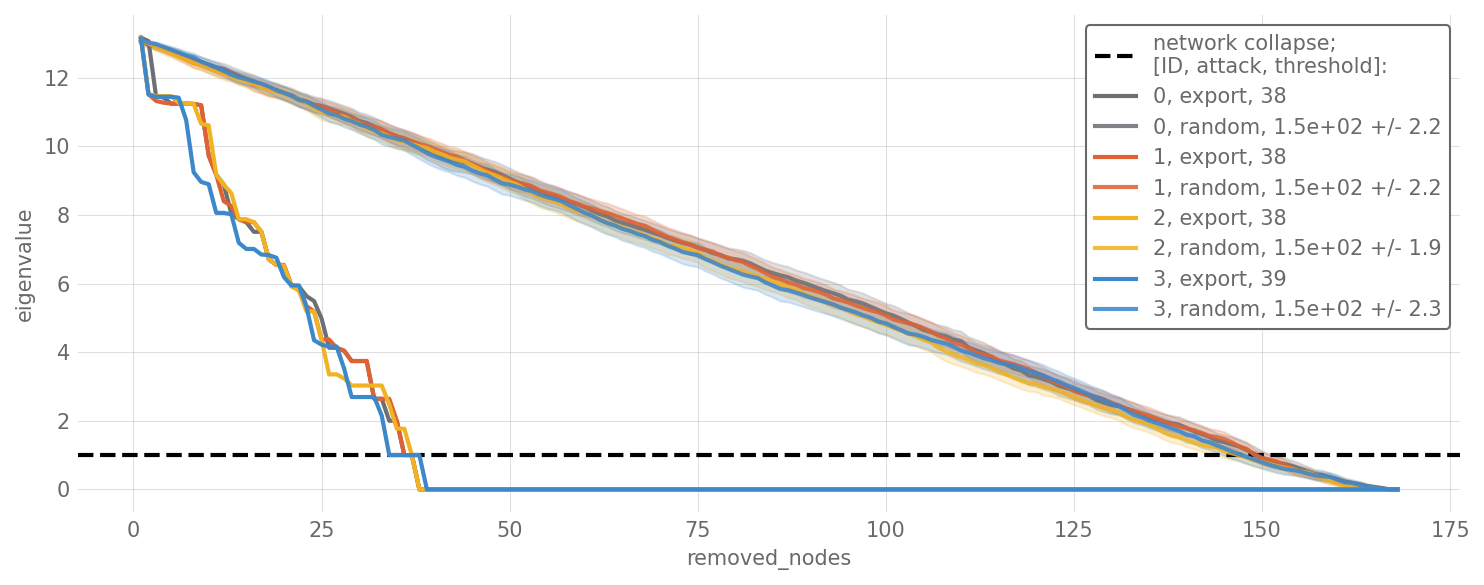

In [15]:
comparison.plot_attack_resilience(exclude_attacks="entropic")